# Creating features 

## For master thesis need to create features

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt


In [2]:
# latex frmat for plot

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size":14})
    
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [3]:
# Orange

input_data_matrix_1 = np.loadtxt('./test152/1_1_2_1.txt', delimiter = ',')
input_data_matrix_2 = np.loadtxt('./test152/1_1_2_2.txt', delimiter = ',')
input_data_matrix_3 = np.loadtxt('./test152/1_1_2_3.txt', delimiter = ',')
input_data_matrix_4 = np.loadtxt('./test152/1_1_2_4.txt', delimiter = ',')


In [3]:
# Banana

input_data_matrix_5 = np.loadtxt('./test153/2_1_1_1.txt', delimiter = ',')
input_data_matrix_6 = np.loadtxt('./test153/2_1_1_2.txt', delimiter = ',')
input_data_matrix_7 = np.loadtxt('./test153/2_1_1_3.txt', delimiter = ',')
input_data_matrix_8 = np.loadtxt('./test153/2_1_1_4.txt', delimiter = ',')

| Time(0) | Force command(1)| RTOB force feedback(2) | Deformation distance (3)|  Velocity(4)| Acceleration(5) | Defomation(6) | Stiffness(7) | Area Under the Curve(8) | (9) |
|:-----:|:----:|:----:|:----:|:-----:|:----:|:----:|:----:|:----:|:----:|
|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


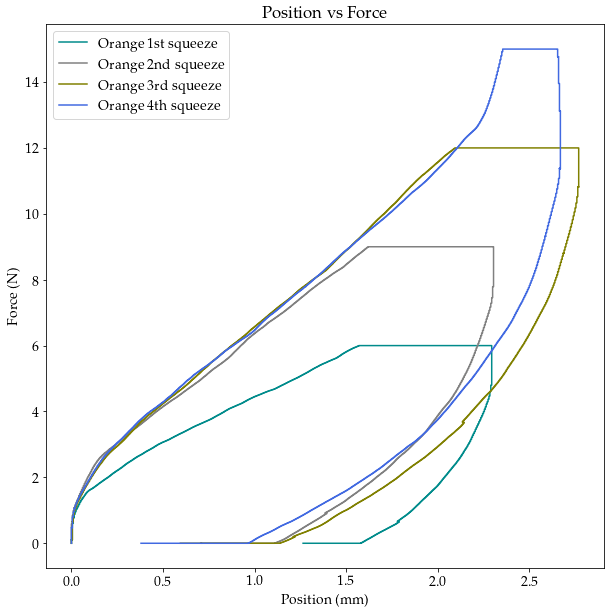

In [4]:
plt.figure(figsize=(10, 10))

plt.plot(input_data_matrix_1[:,3]*0.005, input_data_matrix_1[:,1], c = 'darkcyan', label='Orange 1st squeeze')
plt.plot(input_data_matrix_2[:,3]*0.005, input_data_matrix_2[:,1], c = 'gray',  label='Orange 2nd squeeze')
plt.plot(input_data_matrix_3[:,3]*0.005, input_data_matrix_3[:,1], c = 'olive', label='Orange 3rd squeeze')
plt.plot(input_data_matrix_4[:,3]*0.005, input_data_matrix_4[:,1], c = 'royalblue', label='Orange 4th squeeze')

plt.xlabel('Position (mm)')
plt.ylabel('Force (N)')
plt.title('Position vs Force')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid
plt.savefig('ForcevsPositonTomato.eps', format='eps')
plt.show()


/home/haptic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/haptic/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


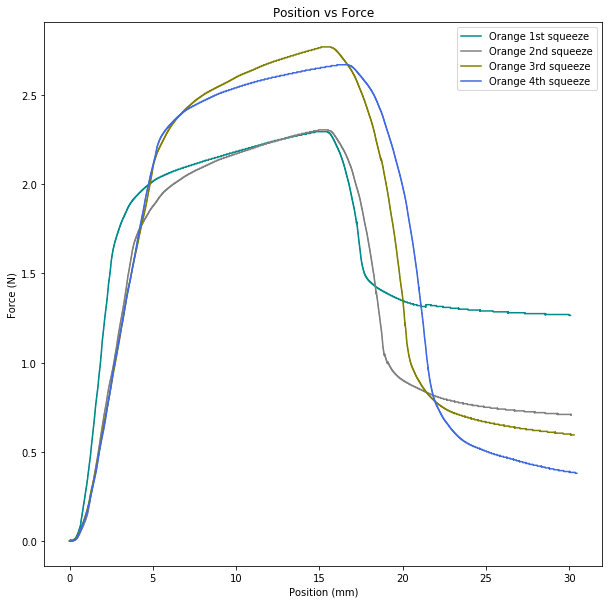

In [17]:
plt.figure(figsize=(10, 10))

plt.plot(input_data_matrix_1[:,0], input_data_matrix_1[:,3]*0.005, c = 'darkcyan', label='Orange 1st squeeze')
plt.plot(input_data_matrix_2[:,0], input_data_matrix_2[:,3]*0.005, c = 'gray', label='Orange 2nd squeeze')
plt.plot(input_data_matrix_3[:,0], input_data_matrix_3[:,3]*0.005, c = 'olive', label='Orange 3rd squeeze')
plt.plot(input_data_matrix_4[:,0], input_data_matrix_4[:,3]*0.005, c = 'royalblue',label='Orange 4th squeeze')

plt.xlabel('Position (mm)')
plt.ylabel('Force (N)')
plt.title('Position vs Force')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid
plt.savefig('TimevsPositionVariationTomato.eps', format='eps')
plt.show()


# Creating features

In [5]:
rows_1 = input_data_matrix_1.shape[0]
features_1 = np.zeros((rows_1,10))

In [6]:
input_data_matrix_1.shape[0]

2600000

In [7]:
features_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
features_1[:,0] = input_data_matrix_1[:,0]
features_1[:,1] = input_data_matrix_1[:,1]
features_1[:,2] = input_data_matrix_1[:,2]
features_1[:,3] = input_data_matrix_1[:,3]*0.005 

# Creating velocity with multiple methods

In [9]:
g = 3.95
x = 0
velocity_sum = 0
for x in range (rows_1 - 1):
    time_deff = features_1[(x+1),0] - features_1[x,0]
    velocity_sum = velocity_sum + features_1[x,4]*time_deff      
    features_1[(x+1),4] = g*(features_1[(x+1),3] - velocity_sum)

In [10]:
g = 5.1
x = 0
velocity_sum = 0
for x in range (rows_1 - 1):
    time_deff = features_1[(x+1),0] - features_1[x,0]
    velocity_sum = velocity_sum + features_1[x,4]*time_deff      
    features_1[(x+1),5] = g*(features_1[(x+1),3] - velocity_sum)

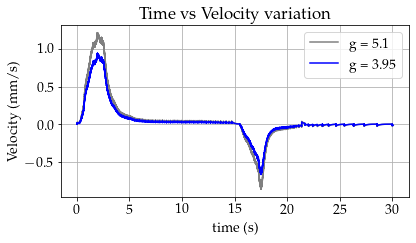

In [40]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_1[:,0], features_1[:,5], c = 'gray', label='g = 5.1')
plt.plot(features_1[:,0], features_1[:,4], c = 'b', label='g = 3.95')

plt.xlabel('time (s)')
plt.ylabel('Velocity (mm/s)')
plt.title('Time vs Velocity variation')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('Fig_6_velocity_LPF_multiple_fc.pdf')
plt.show()

In [12]:
filter_gap = 1
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_1[(x+filter_gap),0] - features_1[x,0]
    position_deff = features_1[(x+filter_gap),3] - features_1[x,3]
    features_1[(x+filter_gap),6] = position_deff/time_deff

In [13]:
filter_gap = 500
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_1[(x+filter_gap),0] - features_1[x,0]
    position_deff = features_1[(x+filter_gap),3] - features_1[x,3]
    features_1[(x+filter_gap),7] = position_deff/time_deff

In [14]:
filter_gap = 2000
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_1[(x+filter_gap),0] - features_1[x,0]
    position_deff = features_1[(x+filter_gap),3] - features_1[x,3]
    features_1[(x+filter_gap),8] = position_deff/time_deff

In [15]:
filter_gap = 20000
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_1[(x+filter_gap),0] - features_1[x,0]
    position_deff = features_1[(x+filter_gap),3] - features_1[x,3]
    features_1[(x+filter_gap),9] = position_deff/time_deff

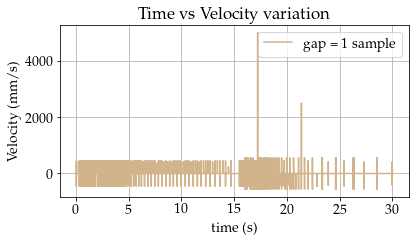

In [37]:
plt.figure(figsize=(6, 3.6))


plt.plot(features_1[:,0], features_1[:,6], c = 'tan', label='gap = 1 sample')

plt.xlabel('time (s)')
plt.ylabel('Velocity (mm/s)')
plt.title('Time vs Velocity variation')

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('Fig_4_velocity_dif.eps', format='eps')
plt.savefig('Fig_4_velocity_dif.pdf')
plt.show()

/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


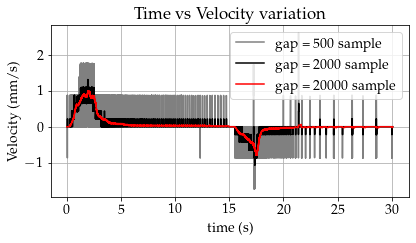

In [38]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_1[:,0], features_1[:,7], c = 'gray', label='gap = 500 sample')
plt.plot(features_1[:,0], features_1[:,8], c = 'k', label='gap = 2000 sample')
plt.plot(features_1[:,0], features_1[:,9], c = 'r', label='gap = 20000 sample')


#plt.plot(features_1[:,0], features_1[:,9], c = 'B', label='diff fillter_theekshana')

plt.xlabel('time (s)')
plt.ylabel('Velocity (mm/s)')
plt.title('Time vs Velocity variation')

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('Fig_5_velocity_dif_multiple_gap.eps', format='eps')
plt.savefig('Fig_5_velocity_dif_multiple_gap.pdf')
plt.show()


/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if sys.path[0] == '':


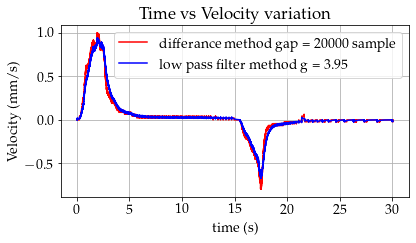

In [41]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_1[:,0], features_1[:,9], c = 'r', label='differance method gap = 20000 sample')
plt.plot(features_1[:,0], features_1[:,4], c = 'b', label='low pass filter method g = 3.95')

plt.xlabel('time (s)')
plt.ylabel('Velocity (mm/s)')
plt.title('Time vs Velocity variation')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('Fig_7_velocity_LPF_and_FDM.pdf')
plt.show()


# Feature 2 accleration

In [21]:
rows_1 = input_data_matrix_1.shape[0]
features_2 = np.zeros((rows_1,10))

In [22]:
features_2 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
features_2[:,0] = input_data_matrix_1[:,0]
features_2[:,1] = input_data_matrix_1[:,1]
features_2[:,2] = input_data_matrix_1[:,2]
features_2[:,3] = input_data_matrix_1[:,3]*0.005 

In [24]:
g = 3.95
x = 0
velocity_sum = 0
for x in range (rows_1 - 1):
    time_deff = features_2[(x+1),0] - features_2[x,0]
    velocity_sum = velocity_sum + features_2[x,4]*time_deff      
    features_2[(x+1),4] = g*(features_2[(x+1),3] - velocity_sum)

In [25]:
filter_gap = 1
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_2[(x+filter_gap),0] - features_2[x,0]
    velocity_deff = features_2[(x+filter_gap),4] - features_2[x,4]
    features_2[(x+filter_gap),5] = velocity_deff/time_deff

In [26]:
filter_gap = 500
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_2[(x+filter_gap),0] - features_2[x,0]
    velocity_deff = features_2[(x+filter_gap),4] - features_2[x,4]
    features_2[(x+filter_gap),6] = velocity_deff/time_deff

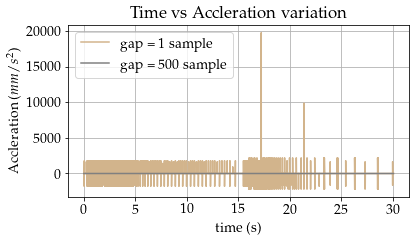

In [42]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_2[:,0], features_2[:,5], c = 'tan', label='gap = 1 sample')
plt.plot(features_2[:,0], features_2[:,6], c = 'gray', label='gap = 500 sample')


plt.xlabel('time (s)')
plt.ylabel('Accleration ($mm /s^2$)')
plt.title('Time vs Accleration variation')

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('Fig_8_accel_multi_gap_1_500.eps', format='eps')
plt.savefig('Fig_8_accel_multi_gap_1_500.pdf')
plt.show()

In [28]:
filter_gap = 2000
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_2[(x+filter_gap),0] - features_2[x,0]
    velocity_deff = features_2[(x+filter_gap),4] - features_2[x,4]
    features_2[(x+filter_gap),7] = velocity_deff/time_deff

In [29]:
filter_gap = 20000
for x in range (rows_1 - filter_gap - 1):
    time_deff = features_2[(x+filter_gap),0] - features_2[x,0]
    velocity_deff = features_2[(x+filter_gap),4] - features_2[x,4]
    features_2[(x+filter_gap),8] = velocity_deff/time_deff

/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


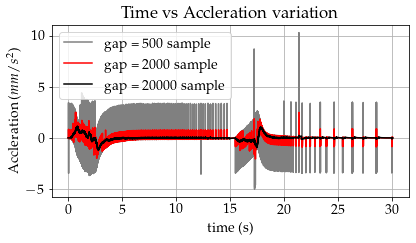

In [43]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_2[:,0], features_2[:,6], c = 'gray', label='gap = 500 sample')
plt.plot(features_2[:,0], features_2[:,7], c = 'r', label='gap = 2000 sample')
plt.plot(features_2[:,0], features_2[:,8], c = 'k', label='gap = 20000 sample')

plt.xlabel('time (s)')
plt.ylabel('Accleration ($mm /s^2$)')
plt.title('Time vs Accleration variation')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('Fig_8_accel_multi_gap_500_2000.pdf')
plt.show()

# Stiffness

In [31]:
rows_1 = input_data_matrix_1.shape[0]
features_3 = np.zeros((rows_1,10))
features_3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
features_3[:,0] = input_data_matrix_1[:,0]
features_3[:,1] = input_data_matrix_1[:,1]
features_3[:,2] = input_data_matrix_1[:,2]
features_3[:,3] = input_data_matrix_1[:,3]*0.005

In [33]:
features_3[:,4] = np.divide(features_3[:,2] , features_3[:,3])

/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


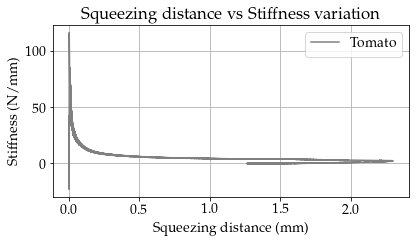

In [44]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_3[:,3], features_3[:,4], c = 'gray', label='Tomato')

plt.xlabel('Squeezing distance (mm)')
plt.ylabel('Stiffness (N/mm)')
plt.title('Squeezing distance vs Stiffness variation')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('Fig_10_stiffness_all_data.pdf')
plt.show()

In [35]:
for x in range (rows_1):
    if features_3[x,3] > 0.05:
        features_3[x,5] = np.divide(input_data_matrix_1[x,2] , input_data_matrix_1[x,3]*0.005)
    else:
        features_3[x,5] = 0
        


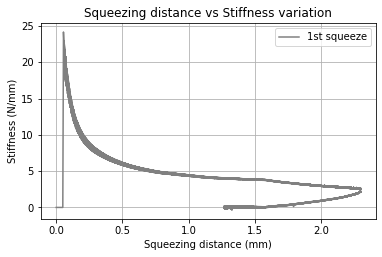

In [28]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_3[:,3], features_3[:,5], c = 'gray', label='Tomato')


plt.xlabel('Squeezing distance (mm)')
plt.ylabel('Stiffness (N/mm)')
plt.title('Squeezing distance vs Stiffness variation')

plt.legend()
plt.grid()
#plt.savefig('Fig_10_stiffness_no0_multiple_squeeze.eps', format='eps')
plt.show()

In [ ]:

plt.plot(features_3[:,3], features_3[:,5], c = 'gray', label='Tomato')


plt.xlabel('Squeezing distance (mm)')
plt.ylabel('Stiffness (N/mm)')
plt.title('Squeezing distance vs Stiffness variation')

plt.legend()
plt.grid()
#plt.savefig('Fig_10_stiffness_no0_multiple_squeeze.eps', format='eps')
plt.show()

## Dataset 1


In [8]:
rows_input_matrix_1 = input_data_matrix_1.shape[0]
rows_input_matrix_2 = input_data_matrix_2.shape[0]
rows_input_matrix_3 = input_data_matrix_3.shape[0]
rows_input_matrix_4 = input_data_matrix_4.shape[0]

rows_features_matrix = rows_input_matrix_1 + rows_input_matrix_2 + rows_input_matrix_3 + rows_input_matrix_4

print(rows_features_matrix)

10400000


In [6]:
nos_of_features = 10
features_matrix = np.zeros(((rows_features_matrix), nos_of_features))

features_matrix.shape

(10400000, 10)

In [7]:
x = 0
for x in range (rows_input_matrix_1):
    features_matrix[x,0] = input_data_matrix_1[x,0]
    features_matrix[x,1] = input_data_matrix_1[x,1]
    features_matrix[x,2] = input_data_matrix_1[x,2]
    features_matrix[x,3] = input_data_matrix_1[x,3]*0.005


x = 0    
for x in range (rows_input_matrix_2):
    features_matrix[rows_input_matrix_1 + x,0] = input_data_matrix_2[x,0] + features_matrix[rows_input_matrix_1-1,0]
    features_matrix[rows_input_matrix_1 + x,1] = input_data_matrix_2[x,1]
    features_matrix[rows_input_matrix_1 + x,2] = input_data_matrix_2[x,2]
    features_matrix[rows_input_matrix_1 + x,3] = input_data_matrix_2[x,3]*0.005 + features_matrix[rows_input_matrix_1-1,3] 

x = 0    
for x in range (rows_input_matrix_3):
    features_matrix[rows_input_matrix_1+rows_input_matrix_2 + x,0] = input_data_matrix_3[x,0] + features_matrix[rows_input_matrix_1+rows_input_matrix_2-1,0]
    features_matrix[rows_input_matrix_1+rows_input_matrix_2 + x,1] = input_data_matrix_3[x,1]
    features_matrix[rows_input_matrix_1+rows_input_matrix_2 + x,2] = input_data_matrix_3[x,2]
    features_matrix[rows_input_matrix_1+rows_input_matrix_2 + x,3] = input_data_matrix_3[x,3]*0.005 + features_matrix[rows_input_matrix_1+rows_input_matrix_2-1,3]
    
x = 0    
for x in range (rows_input_matrix_4):
    features_matrix[rows_input_matrix_1+rows_input_matrix_2+rows_input_matrix_3 + x,0] = input_data_matrix_4[x,0] + features_matrix[rows_input_matrix_1+rows_input_matrix_2+rows_input_matrix_3-1,0]
    features_matrix[rows_input_matrix_1+rows_input_matrix_2+rows_input_matrix_3 + x,1] = input_data_matrix_4[x,1]
    features_matrix[rows_input_matrix_1+rows_input_matrix_2+rows_input_matrix_3 + x,2] = input_data_matrix_4[x,2]
    features_matrix[rows_input_matrix_1+rows_input_matrix_2+rows_input_matrix_3 + x,3] = input_data_matrix_4[x,3]*0.005 + features_matrix[rows_input_matrix_1+rows_input_matrix_2+rows_input_matrix_3-1,3]


## Calculating Force tracking error

In [16]:
force_error_matrix = np.zeros(((rows_features_matrix), 2))

print(force_error_matrix.shape)

force_error_matrix[:,0] = features_matrix[:,1]-features_matrix[:,2]


(10400000, 2)


/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


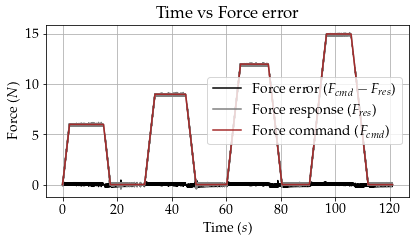

In [39]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,0], force_error_matrix[:,0], c = 'black', label='Force error ($F_{cmd} - F_{res}$)')
plt.plot(features_matrix[:,0], features_matrix[:,2], c = 'gray', label='Force response ($F_{res}$)')
plt.plot(features_matrix[:,0], features_matrix[:,1], c = 'brown', label='Force command ($F_{cmd}$)')

plt.xlabel('Time ($s$)')
plt.ylabel('Force ($N$)')
plt.title('Time vs Force error')

plt.legend()
plt.grid()
#plt.figure(tight_layout=(0,0,1,1))
plt.tight_layout()
#plt.savefig('Fig_17_Force.eps', format='eps')
plt.savefig('Fig_17_1_Force_error.pdf')
plt.show()

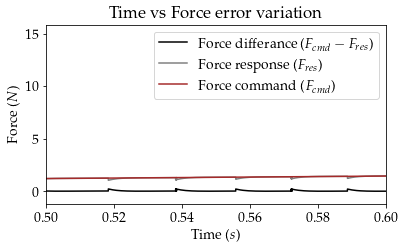

In [52]:
# Create plot limit 

# Create a figure and a subplot
fig = plt.figure()
ax = fig.add_subplot(111)

# Set the size of the figure
fig.set_size_inches(6, 3.7)

ax.plot(features_matrix[:,0], force_error_matrix[:,0],  c = 'black', label='Force differance ($F_{cmd} - F_{res}$) ')
ax.plot(features_matrix[:,0], features_matrix[:,2], c = 'gray', label='Force response ($F_{res}$)')
ax.plot(features_matrix[:,0], features_matrix[:,1], c = 'brown', label='Force command ($F_{cmd}$)')

# Set the plot range
ax.set_xlim([0.5, 0.6]) # Set the x limits to [2, 8]
#ax.set_xlim([0.5182, 0.5184]) # Set the x limits to [2, 8]
#ax.set_ylim([-1.2, 1.2]) # Set the y limits to [-1.2, 1.2]

ax.set_xlabel('Time ($s$)')
ax.set_ylabel('Force ($N$)')
ax.set_title('Time vs Force error variation')

ax.legend()
plt.tight_layout()

# Show the plot
fig.savefig('Fig_17_1_Force_error_zoom.pdf')
plt.show()

# plot

/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


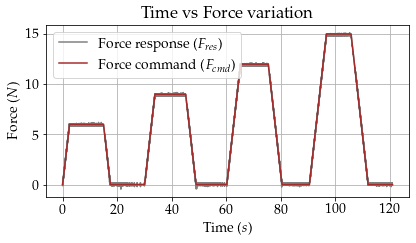

In [44]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,0], features_matrix[:,2], c = 'gray', label='Force response ($F_{res}$)')
plt.plot(features_matrix[:,0], features_matrix[:,1], c = 'brown', label='Force command ($F_{cmd}$)')


plt.xlabel('Time ($s$)')
plt.ylabel('Force ($N$)')
plt.title('Time vs Force variation')

plt.legend()
plt.grid()
#plt.figure(tight_layout=(0,0,1,1))
plt.tight_layout()
#plt.savefig('Fig_17_Force.eps', format='eps')
plt.savefig('Fig_17_Force.pdf')
plt.show()

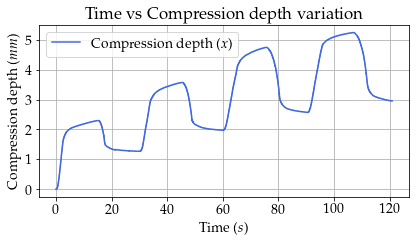

In [59]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,0], features_matrix[:,3], c = 'royalblue', label='Compression depth ($x$)')

plt.xlabel('Time ($s$)')
plt.ylabel('Compression depth ($mm$)')
plt.title('Time vs Compression depth variation')

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('Fig_18_Position.eps', format='eps')
plt.savefig('Fig_18_Position.pdf')
plt.show()

## Velocity Calculation

In [7]:
g = 3.95
x = 0
velocity_sum = 0

for x in range (rows_features_matrix - 1):
    time_deff = features_matrix[(x+1),0] - features_matrix[x,0]
    velocity_sum = velocity_sum + features_matrix[x,4]*time_deff      
    features_matrix[(x+1),4] = g*(features_matrix[(x+1),3] - velocity_sum)
    


### PLOT

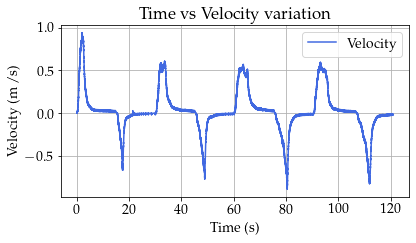

In [51]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,0], features_matrix[:,4], c = 'royalblue', label='Velocity')


plt.xlabel('Time (s)')
plt.ylabel('Velocity (m /s)')
plt.title('Time vs Velocity variation')

plt.legend()
plt.grid()
#plt.savefig('Fig_15_Velocity.eps', format='eps')
plt.tight_layout()
plt.savefig('Fig_15_Velocity.pdf')
plt.show()

## Accleration calculation

In [8]:
filter_gap = 20000
for x in range (rows_features_matrix - filter_gap - 1):
    time_deff = features_matrix[(x+filter_gap),0] - features_matrix[x,0]
    velocity_deff = features_matrix[(x+filter_gap),4] - features_matrix[x,4]
    features_matrix[(x+filter_gap),5] = velocity_deff/time_deff
    

### PLOT

/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


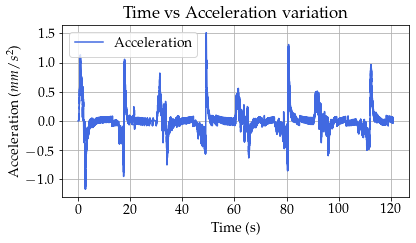

In [47]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,0], features_matrix[:,5], c = 'royalblue', label='Acceleration')


plt.xlabel('Time (s)')
plt.ylabel('Acceleration ($mm /s^2$)')
plt.title('Time vs Acceleration variation')

plt.legend()
plt.grid()
#plt.savefig('Fig_16_accleration.eps', format='eps')
plt.tight_layout()
plt.savefig('Fig_16_acceleration.pdf')
plt.show()

## Stiffness calculation

In [9]:
for x in range (features_matrix.shape[0]-1):
    if features_matrix[x,3] > 0.3:
        features_matrix[x,6] = np.divide(features_matrix[x,2],features_matrix[x,3])


### Plot

plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,3], features_matrix[:,6], c = 'royalblue', label='Stiffness')


plt.xlabel('Squeezed distance (mm)')
plt.ylabel('Stiffness ($N/mm$)')
plt.title('Squeezed distance vs Stiffness variation')

plt.legend()
plt.grid()
plt.savefig('Fig_19_Striffness.eps', format='eps')
plt.show()


# Viscosity calculation

In [10]:
for x in range (rows_features_matrix - 1):
    if features_matrix[x,4] > 0.2:
        features_matrix[x,7] = np.divide(features_matrix[x,1],features_matrix[x,4])


### Plot

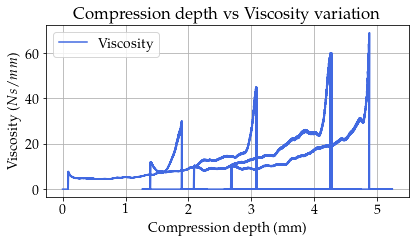

In [57]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,3], features_matrix[:,7], c = 'royalblue', label='Viscosity')


plt.xlabel('Compression depth (mm)')
plt.ylabel('Viscosity ($Ns/mm$)')
plt.title('Compression depth vs Viscosity variation')

plt.legend()
plt.grid()
#plt.savefig('Fig_20_Viscosity.eps', format='eps')
plt.tight_layout()
plt.savefig('Fig_20_Viscosity.pdf')
plt.show()


# Plotting

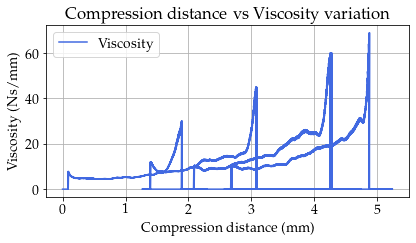

In [59]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,3], features_matrix[:,7], c = 'royalblue', label='Viscosity')

plt.xlabel('Compression distance (mm)')
plt.ylabel('Viscosity (Ns/mm)')
plt.title('Compression distance vs Viscosity variation')

plt.legend()
plt.grid()
#plt.savefig('Fig_11_Viscosness_multiple_squeeze.eps', format='eps')
plt.tight_layout()
plt.savefig('Fig_11_Viscosness_multiple_squeeze.pdf')

plt.show()


## Energy absorbed

In [11]:
cumulative_energy_sum = 0.0

# trapz rule of area under the curve

for x in range (rows_features_matrix - 1):
    cumulative_energy_sum = cumulative_energy_sum + ((features_matrix[x,2] + features_matrix[x+1,2])/2)*(features_matrix[x+1,3] - features_matrix[x,3])
    features_matrix[x+1,8] = cumulative_energy_sum
    


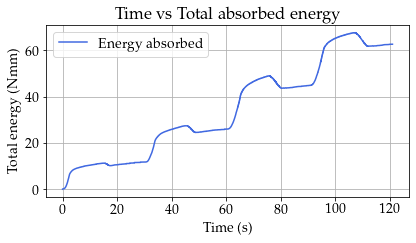

In [52]:
plt.figure(figsize=(6, 3.6))

plt.plot(features_matrix[:,0], features_matrix[:,8], c = 'royalblue', label='Energy absorbed')

plt.xlabel('Time (s)')
plt.ylabel('Total energy (Nmm)')
plt.title('Time vs Total absorbed energy ')

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('Fig_12_Energy_absorbed_multiple_squeeze.eps', format='eps')
plt.savefig('Fig_12_Energy_absorbed_multiple_squeeze.pdf')

plt.show()

## Dataset 2

In [53]:
rows_input_matrix_5 = input_data_matrix_5.shape[0]
rows_input_matrix_6 = input_data_matrix_6.shape[0]
rows_input_matrix_7 = input_data_matrix_7.shape[0]
rows_input_matrix_8 = input_data_matrix_8.shape[0]

rows_features_matrix_2 = rows_input_matrix_5 + rows_input_matrix_6 + rows_input_matrix_7 + rows_input_matrix_8

print(rows_features_matrix_2)

10400000


In [54]:
nos_of_features = 10
features_matrix_2 = np.zeros(((rows_features_matrix_2), nos_of_features))

features_matrix_2.shape

(10400000, 10)

In [55]:
x = 0
for x in range (rows_input_matrix_5):
    features_matrix_2[x,0] = input_data_matrix_5[x,0]
    features_matrix_2[x,1] = input_data_matrix_5[x,1]
    features_matrix_2[x,2] = input_data_matrix_5[x,2]
    features_matrix_2[x,3] = input_data_matrix_5[x,3]*0.005


x = 0    
for x in range (rows_input_matrix_6):
    features_matrix_2[rows_input_matrix_5 + x,0] = input_data_matrix_6[x,0] + features_matrix_2[rows_input_matrix_5-1,0]
    features_matrix_2[rows_input_matrix_5 + x,1] = input_data_matrix_6[x,1]
    features_matrix_2[rows_input_matrix_5 + x,2] = input_data_matrix_6[x,2]
    features_matrix_2[rows_input_matrix_5 + x,3] = input_data_matrix_6[x,3]*0.005 + features_matrix_2[rows_input_matrix_5-1,3] 

x = 0    
for x in range (rows_input_matrix_7):
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6 + x,0] = input_data_matrix_7[x,0] + features_matrix_2[rows_input_matrix_5+rows_input_matrix_6-1,0]
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6 + x,1] = input_data_matrix_7[x,1]
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6 + x,2] = input_data_matrix_7[x,2]
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6 + x,3] = input_data_matrix_7[x,3]*0.005 + features_matrix_2[rows_input_matrix_5+rows_input_matrix_6-1,3]
    
x = 0    
for x in range (rows_input_matrix_8):
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6+rows_input_matrix_7 + x,0] = input_data_matrix_8[x,0] + features_matrix_2[rows_input_matrix_5+rows_input_matrix_6+rows_input_matrix_7-1,0]
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6+rows_input_matrix_7 + x,1] = input_data_matrix_8[x,1]
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6+rows_input_matrix_7 + x,2] = input_data_matrix_8[x,2]
    features_matrix_2[rows_input_matrix_5+rows_input_matrix_6+rows_input_matrix_7 + x,3] = input_data_matrix_8[x,3]*0.005 + features_matrix_2[rows_input_matrix_5+rows_input_matrix_6+rows_input_matrix_7-1,3]


In [56]:
for x in range (features_matrix_2.shape[0]-1):
    if features_matrix_2[x,3] > 0.04:
        features_matrix_2[x,5] = np.divide(features_matrix_2[x,1],features_matrix_2[x,3])

No handles with labels found to put in legend.


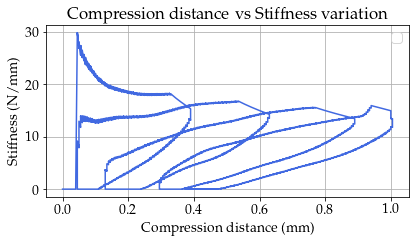

In [58]:
plt.figure(figsize=(6, 3.6))

#plt.plot(features_matrix[:,3], features_matrix[:,5], c = 'gray', label='Tomato')
plt.plot(features_matrix_2[:,3], features_matrix_2[:,5], c = 'royalblue')

plt.xlabel('Compression distance (mm)')
plt.ylabel('Stiffness (N/mm)')
plt.title('Compression distance vs Stiffness variation')
plt.tight_layout()
plt.legend()
plt.grid()
#plt.savefig('Fig_10_stiffness_multiple_squeeze.eps', format='eps')
plt.savefig('Fig_10_stiffness_multiple_squeeze.pdf')
plt.show()

c# Plot all importent

/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


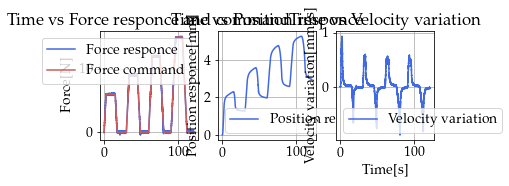

In [16]:
fig, axs = plt.subplots(1,3, figsize=(6,2))

axs[0].set_ylabel('Force[N]')
axs[0].grid()
axs[0].plot(features_matrix[:,0], features_matrix[:,2], c='royalblue', label = 'Force responce')
axs[0].plot(features_matrix[:,0], features_matrix[:,1], c='indianred', label = 'Force command')
axs[0].set_title('Time vs Force responce and command')
axs[0].legend()

axs[1].set_ylabel('Position responce[mm]')
axs[1].grid()
axs[1].plot(features_matrix[:,0], features_matrix[:,3], c='royalblue', label = 'Position responce')
axs[1].set_title('Time vs Position responce')
axs[1].legend()

axs[2].set_xlabel('Time[s]')
axs[2].set_ylabel('Velocity variation[mm/s]')
axs[2].grid()
axs[2].plot(features_matrix[:,0], features_matrix[:,4], c='royalblue', label = 'Velocity variation')
axs[2].set_title('Time vs Velocity variation')
axs[2].legend()


#fig.savefig('Fig_13_all_timescale.eps', format='eps')
fig.savefig('Fig_13_all_timescale.pdf')



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


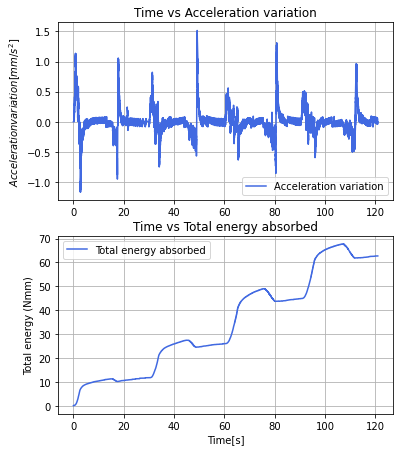

In [15]:
fig, axs = plt.subplots(2, figsize=(6,7.2))

axs[0].set_ylabel('$Acceleration variation[mm/s^{2}]$')
axs[0].grid()
axs[0].plot(features_matrix[:,0], features_matrix[:,9], c='royalblue', label = 'Acceleration variation')
axs[0].set_title('Time vs Acceleration variation')
axs[0].legend()

axs[1].set_xlabel('Time[s]')
axs[1].set_ylabel('Total energy (Nmm)')
axs[1].grid()
axs[1].plot(features_matrix[:,0], features_matrix[:,8], c='royalblue', label = 'Total energy absorbed')
axs[1].set_title('Time vs Total energy absorbed')
axs[1].legend()

#fig.savefig('Fig_14_all_timescale.eps', format='eps')

fig.savefig('Fig_14_all_timescale.eps', format='eps')


# Creating Image of force variation 

In [9]:
#"./1_1_1_1.txt","./1_1_1_2.txt","./1_1_1_3.txt","./1_1_1_4.txt","./1_1_2_1.txt","./1_1_2_2.txt","./1_1_2_3.txt","./1_1_2_4.txt","./1_1_3_1.txt","./1_1_3_2.txt","./1_1_3_3.txt","./1_1_3_4.txt","./1_1_4_1.txt","./1_1_4_2.txt","./1_1_4_3.txt","./1_1_4_4.txt"

# Orange

input_data_matrix_1 = np.loadtxt('./test153/2_1_1_1.txt', delimiter = ',')
input_data_matrix_2 = np.loadtxt('./test153/2_1_1_2.txt', delimiter = ',')
input_data_matrix_3 = np.loadtxt('./test153/2_1_1_3.txt', delimiter = ',')
input_data_matrix_4 = np.loadtxt('./test153/2_1_1_4.txt', delimiter = ',')

input_data_matrix_5 = np.loadtxt('./test153/2_1_2_1.txt', delimiter = ',')
input_data_matrix_6 = np.loadtxt('./test153/2_1_2_2.txt', delimiter = ',')
input_data_matrix_7 = np.loadtxt('./test153/2_1_2_3.txt', delimiter = ',')
input_data_matrix_8 = np.loadtxt('./test153/2_1_2_4.txt', delimiter = ',')

input_data_matrix_9 = np.loadtxt('./test153/2_1_3_1.txt', delimiter = ',')
input_data_matrix_10 = np.loadtxt('./test153/2_1_3_2.txt', delimiter = ',')
input_data_matrix_11 = np.loadtxt('./test153/2_1_3_3.txt', delimiter = ',')
input_data_matrix_12 = np.loadtxt('./test153/2_1_3_4.txt', delimiter = ',')

input_data_matrix_13 = np.loadtxt('./test153/2_1_4_1.txt', delimiter = ',')
input_data_matrix_14 = np.loadtxt('./test153/2_1_4_2.txt', delimiter = ',')
input_data_matrix_15 = np.loadtxt('./test153/2_1_4_3.txt', delimiter = ',')
input_data_matrix_16 = np.loadtxt('./test153/2_1_4_4.txt', delimiter = ',')


/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


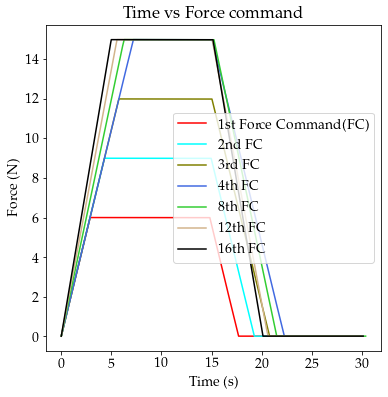

In [10]:
plt.figure(figsize=(6, 6))

plt.plot(input_data_matrix_1[:,0], input_data_matrix_1[:,1], c = 'red', label='1st Force Command(FC)')
plt.plot(input_data_matrix_2[:,0], input_data_matrix_2[:,1], c = 'cyan', label='2nd FC')
plt.plot(input_data_matrix_3[:,0], input_data_matrix_3[:,1], c = 'olive', label='3rd FC')
plt.plot(input_data_matrix_4[:,0], input_data_matrix_4[:,1], c = 'royalblue',label='4th FC')

#plt.plot(input_data_matrix_5[:,0], input_data_matrix_5[:,1], c = 'yellow', label='5th FC')
#plt.plot(input_data_matrix_6[:,0], input_data_matrix_6[:,1], c = 'blue', label='6th FC')
#plt.plot(input_data_matrix_7[:,0], input_data_matrix_7[:,1], c = 'skyblue', label='7th FC')
plt.plot(input_data_matrix_8[:,0], input_data_matrix_8[:,1], c = 'limegreen',label='8th FC')

#plt.plot(input_data_matrix_9[:,0], input_data_matrix_9[:,1], c = 'blue', label='9th FC')
#plt.plot(input_data_matrix_10[:,0], input_data_matrix_10[:,1], c = 'orange', label='10th FC')
#plt.plot(input_data_matrix_11[:,0], input_data_matrix_11[:,1], c = 'violet', label='11th FC')
plt.plot(input_data_matrix_12[:,0], input_data_matrix_12[:,1], c = 'tan',label='12th FC')

#plt.plot(input_data_matrix_13[:,0], input_data_matrix_13[:,1], c = 'pink', label='13th FC')
#plt.plot(input_data_matrix_14[:,0], input_data_matrix_14[:,1], c = 'lightgreen', label='14th FC')
#plt.plot(input_data_matrix_15[:,0], input_data_matrix_15[:,1], c = 'silver', label='15th FC')
plt.plot(input_data_matrix_16[:,0], input_data_matrix_16[:,1], c = 'black',label='16th FC')



plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.title('Time vs Force command')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid
plt.savefig('Fig_29_Timevsforcevariation.pdf')
plt.show()

# Creating images of position variation 


In [3]:
# Orange
input_data_matrix_1 = np.loadtxt('./test152/1_1_2_1.txt', delimiter = ',') # Orange
input_data_matrix_2 = np.loadtxt('./test156/5_1_2_1.txt', delimiter = ',') # BOTTLE 
#input_data_matrix_2 = np.loadtxt('./test153/2_1_2_1.txt', delimiter = ',') # Banana
input_data_matrix_3 = np.loadtxt('./test154/3_1_2_1.txt', delimiter = ',') # Sponge
input_data_matrix_4 = np.loadtxt('./test155/4_1_2_1.txt', delimiter = ',')  # Onion
input_data_matrix_5 = np.loadtxt('./test169/18_1_2_1.txt', delimiter = ',') # tomato



/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


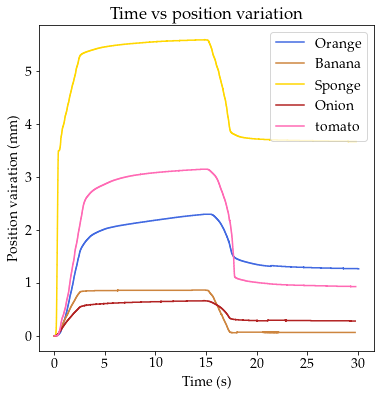

In [8]:
plt.figure(figsize=(6, 6))

plt.plot(input_data_matrix_1[:,0], input_data_matrix_1[:,3]*0.005, c = 'royalblue', label='Orange')
plt.plot(input_data_matrix_2[:,0], input_data_matrix_2[:,3]*0.005, c = 'peru', label='Banana')
plt.plot(input_data_matrix_3[:,0], input_data_matrix_3[:,3]*0.005, c = 'gold', label='Sponge')
plt.plot(input_data_matrix_4[:,0], input_data_matrix_4[:,3]*0.005, c = 'firebrick', label='Onion')
plt.plot(input_data_matrix_5[:,0], input_data_matrix_5[:,3]*0.005, c = 'hotpink', label='tomato')


plt.xlabel('Time (s)')
plt.ylabel('Position vairation (mm)')
plt.title('Time vs position variation ')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid
plt.savefig('Fig_30_Timevsdataset1Position.pdf')


In [5]:
# Dataset 2
input_data_matrix_5 = np.loadtxt('./test166/15_1_1_1.txt', delimiter = ',') # tomato
input_data_matrix_6 = np.loadtxt('./test160/9_1_1_1.txt', delimiter = ',') # Orange

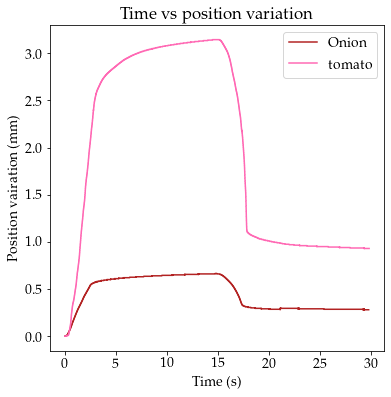

In [6]:
plt.figure(figsize=(6, 6))


plt.plot(input_data_matrix_4[:,0], input_data_matrix_4[:,3]*0.005, c = 'firebrick', label='Onion')
plt.plot(input_data_matrix_5[:,0], input_data_matrix_5[:,3]*0.005, c = 'hotpink', label='tomato')


plt.xlabel('Time (s)')
plt.ylabel('Position vairation (mm)')
plt.title('Time vs position variation ')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid
plt.savefig('Fig_31_Timevsdataset2Position.pdf')


/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


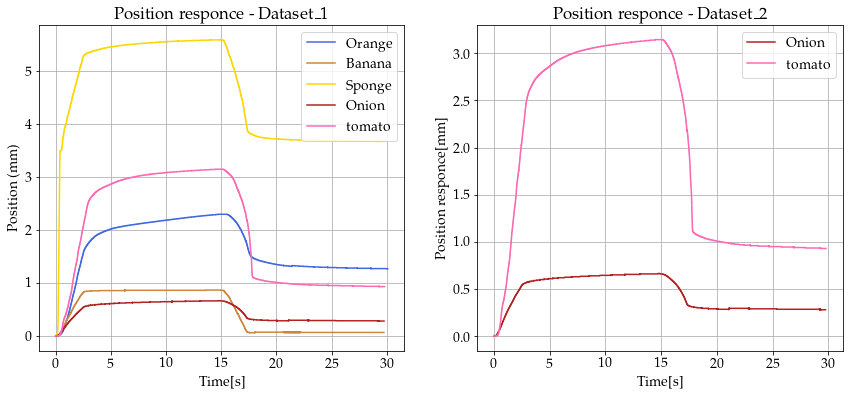

In [38]:
fig, axs = plt.subplots(1,2, figsize=(14.4,6))

axs[0].set_xlabel('Time[s]')
axs[0].set_ylabel('Position (mm)')
axs[0].grid()
axs[0].plot(input_data_matrix_1[:,0], input_data_matrix_1[:,3]*0.005, c = 'royalblue', label='Orange')
axs[0].plot(input_data_matrix_2[:,0], input_data_matrix_2[:,3]*0.005, c = 'peru', label='Banana')
axs[0].plot(input_data_matrix_3[:,0], input_data_matrix_3[:,3]*0.005, c = 'gold', label='Sponge')
axs[0].plot(input_data_matrix_4[:,0], input_data_matrix_4[:,3]*0.005, c = 'firebrick', label='Onion')
axs[0].plot(input_data_matrix_5[:,0], input_data_matrix_5[:,3]*0.005, c = 'hotpink', label='tomato')
axs[0].set_title('Position responce - Dataset\_1')
axs[0].legend()
#axs[0].legend(bbox_to_anchor=(0.65, .60))

axs[1].set_xlabel('Time[s]')
axs[1].set_ylabel('Position responce[mm]')
axs[1].grid()
axs[1].plot(input_data_matrix_4[:,0], input_data_matrix_4[:,3]*0.005, c = 'firebrick', label='Onion')
axs[1].plot(input_data_matrix_5[:,0], input_data_matrix_5[:,3]*0.005, c = 'hotpink', label='tomato')
axs[1].set_title('Position responce - Dataset\_2')
axs[1].legend()
#axs[1].legend(bbox_to_anchor=(1., 1.0))

#axs[2].set_xlabel('Time[s]')
#axs[2].set_ylabel('Velocity variation[mm/s]')
#axs[2].grid()
#axs[2].plot(features_matrix[:,0], features_matrix[:,4], c='royalblue', label = 'Velocity variation')
#axs[2].set_title('Time vs Velocity variation')
#axs[2].legend()


#fig.savefig('Fig_13_all_timescale.eps', format='eps')
fig.savefig('Fig_32_all_timescale.pdf')


---

---

# Create program to address the review comments



In [3]:
# Orange

input_data_matrix_1 = np.loadtxt('./test152/1_1_2_1.txt', delimiter = ',')

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

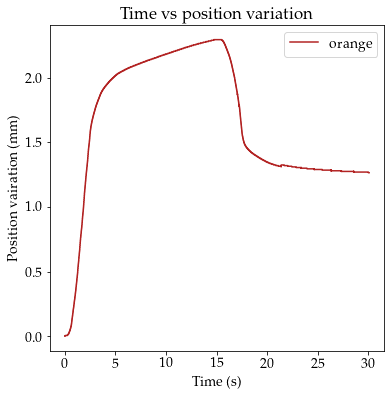

In [4]:
plt.figure(figsize=(6, 6))


plt.plot(input_data_matrix_1[:,0], input_data_matrix_1[:,3]*0.005, c = 'firebrick', label='orange')


plt.xlabel('Time (s)')
plt.ylabel('Position vairation (mm)')
plt.title('Time vs position variation ')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid

# 1. Velocity calculation using the same method as DOB


In [5]:
# velocity calculation in DOB

# use deferianciation after differanciation 

# g_vel = 150

# g_dis = 300

rows_1 = input_data_matrix_1.shape[0] # get the rows count
velocity_matrix = np.zeros((rows_1,4))  # create empty matrix 

print (input_data_matrix_1.shape)
print(velocity_matrix.shape)

(2600000, 4)
(2600000, 4)


Cutoff freaquancy 

https://www.allaboutcircuits.com/technical-articles/understanding-transfer-functions-for-low-pass-filters/


In [6]:
# Method 1 : Propsed method in feacture extraction section in thesis and paper.

g = 3.95
x = 0
velocity_sum = 0

for x in range (rows_1 - 1):
    time_deff = input_data_matrix_1[(x+1),0] - input_data_matrix_1[x,0]
    velocity_sum = velocity_sum + velocity_matrix[x,0]*time_deff
    velocity_matrix[(x+1),0] = g*(input_data_matrix_1[(x+1),3] - velocity_sum)
    
# Method 2 : Propsed method in DoB calculation section.

g = 150
x = 0
velocity_sum = 0
    
for x in range (rows_1 - 1):
    time_deff = input_data_matrix_1[(x+1),0] - input_data_matrix_1[x,0]
    velocity_sum = velocity_sum + velocity_matrix[x,1]*time_deff
    velocity_matrix[(x+1),1] = g*(input_data_matrix_1[(x+1),3] - velocity_sum)


The centered difference approximation for velocity is typically expressed as:

v(t_i) ≈ [x(t_{i+1}) - x(t_{i-1})] / [t_{i+1} - t_{i-1}]


where v(t_i) is the velocity at time t_i, x(t_i) is the position at time t_i, and t_{i+1} and t_{i-1} are the neighboring time values.

If the time values are unevenly spaced, the formula can be modified to take this into account. One common approach is to use a weighted average of the forward and backward difference approximations:

v(t_i) ≈ w_i [x(t_{i+1}) - x(t_i)] / [t_{i+1} - t_i] + (1 - w_i) [x(t_i) - x(t_{i-1})] / [t_i - t_{i-1}]

where w_i is a weight that depends on the spacing of the neighboring time values:

w_i = (t_i - t_{i-1}) / (t_{i+1} - t_{i-1})

This formula gives a more accurate approximation of the velocity when the time values are unevenly spaced, but it can be more complicated to implement than the standard centered difference approximation


https://edisciplinas.usp.br/pluginfile.php/41896/mod_resource/content/1/LeVeque%20Finite%20Diff.pdf

http://hplgit.github.io/INF5620/doc/pub/sphinx-decay/._main_decay001.html



In [ ]:
# Method 3 : Propsed method by reviewer 2 - FINITE DIFERENTIATOR (Common finite differance method).
# without low-pass filter 
x = 0
pisition_dif_1 = 0
pisition_dif_2 = 0
time_deff_1 = 0
time_deff_2 = 0


for x in range (rows_1 - 1):
    time_deff_1 = input_data_matrix_1[(x+1),0] - input_data_matrix_1[x,0]
    time_deff_2 = input_data_matrix_1[(x+2),0] - input_data_matrix_1[(x+1),0]
    pisition_dif_1 = input_data_matrix_1[(x+1),3] - input_data_matrix_1[x,3]
    pisition_dif_2 = input_data_matrix_1[(x+2),3] - input_data_matrix_1[(x+1),3]
    velocity_matrix[(x+1),2] = pisition_dif_1/time_deff_1
    
    

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

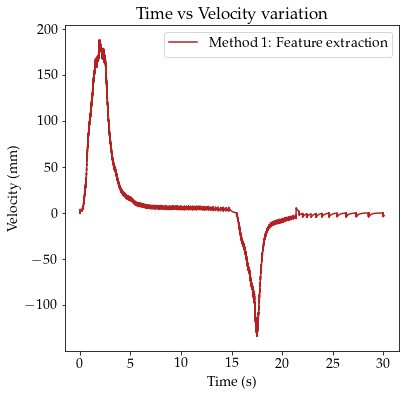

In [53]:
plt.figure(figsize=(6, 6))

plt.plot(input_data_matrix_1[:,0], velocity_matrix[:,0], c = 'firebrick', label='Method 1: Feature extraction')

plt.xlabel('Time (s)')
plt.ylabel('Velocity (mm)')
plt.title('Time vs Velocity variation')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

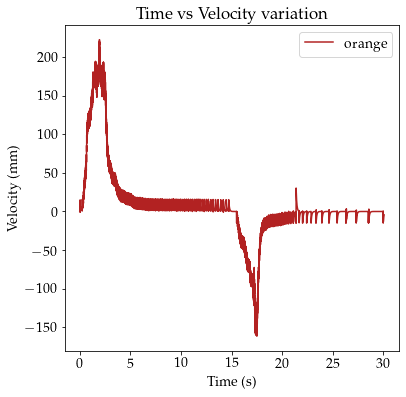

In [33]:
plt.figure(figsize=(6, 6))

plt.plot(input_data_matrix_1[:,0], velocity_matrix[:,1], c = 'firebrick', label='orange')

plt.xlabel('Time (s)')
plt.ylabel('Velocity (mm)')
plt.title('Time vs Velocity variation')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

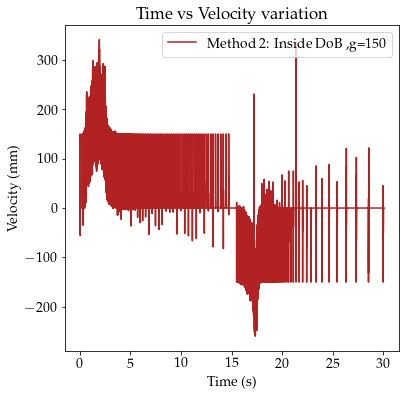

In [54]:
plt.figure(figsize=(6, 6))

plt.plot(input_data_matrix_1[:,0], velocity_matrix[:,2], c = 'firebrick', label='Method 2: Inside DoB ,g=150')

plt.xlabel('Time (s)')
plt.ylabel('Velocity (mm)')
plt.title('Time vs Velocity variation')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid

# Acceleration calculation 

In [7]:
rows_1 = input_data_matrix_1.shape[0] # get the rows count
acceleration_matrix = np.zeros((rows_1,4))  # create empty matrix 


In [10]:
filter_gap = 20000
for x in range (rows_1 - filter_gap - 1):
    time_deff = input_data_matrix_1 [(x+filter_gap),0] - input_data_matrix_1[x,0]
    velocity_deff = velocity_matrix[(x+filter_gap),0] - velocity_matrix[x,0] 
    acceleration_matrix[(x+filter_gap),1] = velocity_deff/time_deff

In [8]:
g = 300
x = 0

accleration_sum = 0

for x in range (rows_1 - 1):
    time_deff = input_data_matrix_1[(x+1),0] - input_data_matrix_1[x,0]
    accleration_sum = accleration_sum + acceleration_matrix[x,0]*time_deff
    acceleration_matrix[(x+1),0] = g*(velocity_matrix[(x+1),0] - accleration_sum)

In [ ]:
Method 

g = 300
x = 0

accleration_sum = 0

for x in range (rows_1 - 1):
    time_deff = input_data_matrix_1[(x+1),0] - input_data_matrix_1[x,0]
    accleration_sum = accleration_sum + acceleration_matrix[x,0]*time_deff
    acceleration_matrix[(x+1),0] = g*(velocity_matrix[(x+1),0] - accleration_sum)

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

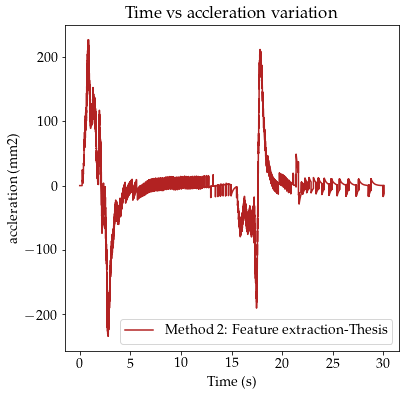

In [11]:
plt.figure(figsize=(6, 6))

plt.plot(input_data_matrix_1[:,0], acceleration_matrix[:,1], c = 'firebrick', label='Method 1: Feature extraction-Thesis')

plt.xlabel('Time (s)')
plt.ylabel('accleration (mm2)')
plt.title('Time vs accleration variation')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

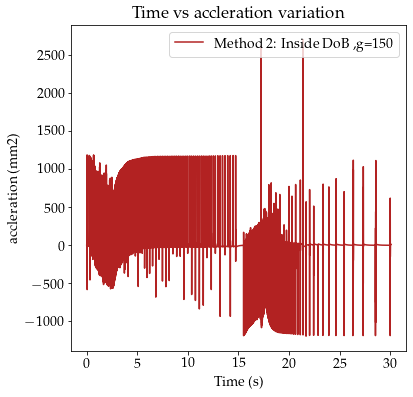

In [9]:
plt.figure(figsize=(6, 6))

plt.plot(input_data_matrix_1[:,0], acceleration_matrix[:,0], c = 'firebrick', label='Method 2: Inside DoB ,g=150')

plt.xlabel('Time (s)')
plt.ylabel('accleration (mm2)')
plt.title('Time vs accleration variation')

#plt.plot(features_matrix_3[:,0], features_matrix_3[:,3]*0.005)
#plt.set(xlabel='Force', ylabel='Deformation', title='deformation ratio')
plt.legend()
plt.grid

# Notes 


[Resource](https://hplgit.github.io/INF5620/doc/pub/sphinx-decay/._main_decay001.html)


Velocity calculation theory : Finite difference methods
============================

__Goal__ : We explain the basic ideas of finite difference methods using a simple ordinary differential equation $(u'=-au)$ as primary example. Emphasis is put on the reasoning when discretizing the problem and introduction of key concepts such as mesh, mesh function, finite difference approximations, averaging in a mesh, deriation of algorithms, and discrete operator notation.


$[ u'(t_n) = -au(t_n),\quad n=1,\ldots,N_t{\thinspace .}]$


Here, $(a>0)$ is a constant and $(u'(t))$ means differentiation with respect to time \(t\). This type of equation arises in a number of widely different phenomena where some quantity \(u\) undergoes exponential reduction. Examples include radioactive decay, population decay, investment decay, cooling of an object, pressure decay in the atmosphere, and retarded motion in fluids (for some of these models, \(a\) can be negative as well), see the section Applications of exponential decay models for details and motivation. We have chosen this particular ODE not only because its applications are relevant, but even more because studying numerical solution methods for this simple ODE gives important insight that can be reused in much more complicated settings, in particular when solving diffusion-type partial differential equations.

The analytical solution of the ODE is found by the method of separation of variables, which results in

$[u(t) = Ce^{-at},]$

For any arbitrary constant $(C)$. To formulate a mathematical problem for which there is a unique solution, we need a condition to fix the value of \(C\). This condition is known as the initial condition and stated as \(u(0)=I\). That is, we know the value \(I\) of \(u\) when the process starts at \(t=0\). The exact solution is then \(u(t)=Ie^{-at}\).

We seek the solution \(u(t)\) of the ODE for \(t\in (0,T]\). The point \(t=0\) is not included since we know \(u\) here and assume that the equation governs \(u\) for \(t>0\). The complete ODE problem then reads: find \(u(t)\) such that

(1) $ u' = -au,\ t\in (0,T], \quad u(0)=I{\thinspace .}$

This is known as a continuous problem because the parameter \(t\) varies continuously from \(0\) to \(T\). For each \(t\) we have a corresponding \(u(t)\). There are hence infinitely many values of \(t\) and \(u(t)\). The purpose of a numerical method is to formulate a corresponding discrete problem whose solution is characterized by a finite number of values, which can be computed in a finite number of steps on a computer.

\begin{equation} 
    [u(t) = Ce^{-at},]  \label{eq2}
\end{equation}

See (\ref{eq2})

